## Scientific Computation Lab 5 solution

### Task 1: Connected components

A connected component of a graph is a set of nodes where there is at least one path between any pair of nodes in the set. A graph may contain several connected components, and the aim of this task is to assign a distinct numerical label to all nodes belonging to the same component. So, if a graph with 5 nodes has links: 0-1, 1-2, 3-4, then nodes 0,1,2 would be labeled belonging to component "0" and nodes 3,4 would be assigned to component "1". 

The basic algorithm is as follows:

* Initialize numerical label to 0
* Loop through all nodes in graph
    * if current node has not been explored
        * Assign numerical label to current node and label it as explored
        * Find all nodes reachable from current node, label them as explored and assign numerical label to them
        * Increment numerical label



1. Implement this algorithm in the cell below so that it takes a networkx graph as input and creates a list, Lconnect, where Lconnect[i] is the label for the connected component that node i belongs to. You may assume that nodes have 
been numbered from 0 to N-1. You have been provided with a function that implements depth-first search.

In [9]:
%pylab inline
import networkx as nx

def dfs(G,s,L2,label):
    """
    Input:
    G: networkx graph
    s: source node
    L2: labels for reachable nodes, used in conjunction with connect below
    label: label of "current" component as set by connect
    Find reachable nodes using DFS
    Output:
    L2: Labels for all nodes in graph, -1=unreachable from source, label=reachable
    """

    Q=[]
    Q.append(s)
    L2[s]=label

    while len(Q)>0:
        x = Q.pop()
        for v in G.adj[x].keys():
            if L2[v]==-1:
                Q.append(v)
                L2[v]=label
            #print("v=",v)
            #print("Q=",Q)
    return L2

def connect(G):
    """Find connected components of G and label nodes appropriately
    in list, Lconnect.
    """
    Lconnect = [-1 for n in G.nodes()]
    label=0
    #Add code here
    for i in G.nodes():
        if Lconnect[i]==-1:
            Lconnect = dfs(G,i,Lconnect,label)
            label = label+1

    return Lconnect

Populating the interactive namespace from numpy and matplotlib


2. Generate a random graph with multiple connected components and verify that your code is correct. What is the running time of your routine? 

[0, 0, 1, 2, 1, 0, 3, 4, 5, 0]

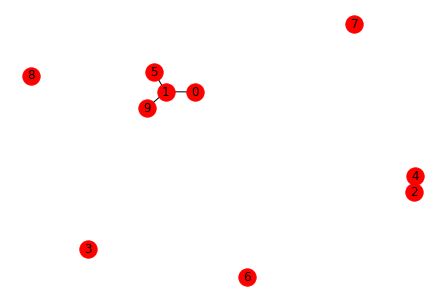

In [5]:
#Add code here
G = nx.erdos_renyi_graph(10,0.1)
nx.draw(G,with_labels=True)
Lconnect = connect(G)
Lconnect

DFS has been modified above for use with *connect*, however its cost remains O(M+N). DFS is called once per connected component, so the total cost is O(M+N)

### Task 2: Numerical solution of an initial value problem

You will now use *odeint* from scipy.integrate to solve the following IVP:

$\frac{dy_1}{dt} =  sin( \omega t) $

$\frac{dy_2}{dt} = y_1 - y_2$

$y_1(0)=1, ~ y_2(0)=0$

and $\omega$ is a parameter that must be specified

1) Create a function named RHS which takes y,t, and $\omega$ as input and returns dy/dt. Note that y and dy/dt should each contain two elements

In [10]:
#Add code here
import numpy as np
def RHS(y,t,w):
    dydt = [0,0]
    dydt[0] = np.sin(w*t)
    dydt[1] = y[0] - y[1]
    return dydt
    
    

2) Now, i) set the variable, y0, to the initial condition, ii) assign a value to $\omega$, and iii) create an array of times, t, between 0 and 1 (inclusive) at which the solution will be computed

In [11]:
import numpy as np
#Add code here
y0 = (1,0)
w = 1
t = np.linspace(0,4*np.pi/w,101)


3) If the previous tasks have been completed correctly, the code below will solve the IVP and return the solution in the array, y

In [12]:
%pylab inline
from scipy.integrate import odeint
y = odeint(RHS,y0,t,args=(w,))

Populating the interactive namespace from numpy and matplotlib


4) What are the dimensions of y? Plot your solution for $y(t)$. Compute the error, $\epsilon(t) = |y_1-y_{1,exact}|$. Is it what you expect? Can you reduce it? For the last part, it may be helpful to look at the online documentation for *odeint*. 

Populating the interactive namespace from numpy and matplotlib


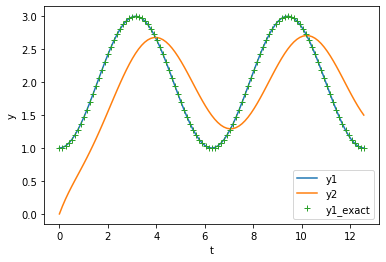

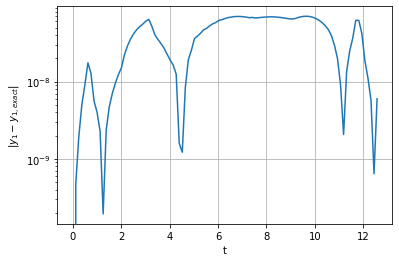

In [18]:
#Add code here
%pylab inline
plt.figure()
plt.plot(t,y[:,0],label='y1')
plt.plot(t,y[:,1],label='y2')
plt.xlabel('t')
plt.ylabel('y')
y1_exact = -np.cos(w*t)/w+1/w+1
plt.plot(t,y1_exact,'+',label='y1_exact')
plt.legend()

#Compute and display error for y1
error = np.abs(y[:,0]-y1_exact)
plt.figure()
plt.semilogy(t,error)
plt.xlabel('t')
plt.ylabel(r'$|y_1-y_{1,exact}|$')
plt.grid()



Adjusting the error tolerances via the call to odeint will change the error (and the walltime):

In [19]:
y = odeint(RHS,y0,t,args=(w,),rtol=1e-12,atol=1e-12)

Populating the interactive namespace from numpy and matplotlib


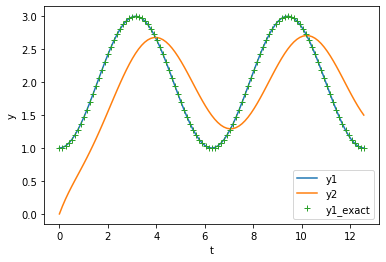

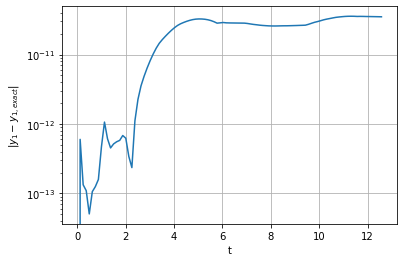

In [21]:
#Add code here
%pylab inline
plt.figure()
plt.plot(t,y[:,0],label='y1')
plt.plot(t,y[:,1],label='y2')
plt.xlabel('t')
plt.ylabel('y')
y1_exact = -np.cos(w*t)/w+1/w+1
plt.plot(t,y1_exact,'+',label='y1_exact')
plt.legend()

#Compute and display error for y1
error = np.abs(y[:,0]-y1_exact)
plt.figure()
plt.semilogy(t,error)
plt.xlabel('t')
plt.ylabel(r'$|y_1-y_{1,exact}|$')
plt.grid()

